___
# Atividade: Soma de variáveis aleatórias - Maldito Chinês
___

## Aula 17

**Preparo Prévio:**
1. Seção 5.1 – págs 137 a 140: aborda como fazer uma distribuição de probabilidade conjunta entre duas variáveis aleatórias X e Y e define função de probabilidade conjunta.
2. Seção 5.2 – págs 146 a 149; págs 156 e 157 (Exemplo 5.12) e págs 158 a 162 (Exemplo 5.13): aborda propriedades de esperança e variância em soma de variáveis aleatórias (X+Y). 

**Hoje:**
1. Descrever as propriedades de distribuição conjunta entre duas variáveis aleatórias discretas.
2. Compreender correlação entre variáveis aleatórias.
3. Descrever as propriedades de esperança e variância para soma de variáveis aleatórias (discretas e contínuas).


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 7.3 (págs 234 a 240).
___

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


___
## <font color='blue'>Exercício 1 - Exemplo 3 da Aula 17 </font>

Num determinado momento em um certo país, a taxa de juros ($X$) pode variar 0,25 pontos percentuais (pp), para cima ou para baixo, ou manter-se constante. 
Já a taxa de câmbio ($Y$) pode variar para mais ou para menos em 1 pp, ou manter-se constante.
A tabela seguinte reflete as distribuições marginais e conjunta dessas duas taxas representadas, aqui, por $X$ e $Y$. 

![Tabela](XeY.png)

Um investidor aplica a mesma quantia num fundo que acompanha a variação da taxa de juros ($X$) e num fundo que acompanha a variação cambial ($Y$). Ao final do dia ele resgatará seu investimento.
1. Encontre a $E(X)$, $Var(X)$, $E(Y)$, $Var(Y)$, $Cov(X,Y)$ e $Corr(X,Y)$.
2. Construa a distribuição de probabilidades do ganho (em variação %) desse investidor, ou seja, encontre todos os valores de $G=0.5*X+0.5*Y$, sendo $G$ o ganho do investidor aplicando metade do dinheiro em $X$ e metade do dinheiro em $Y$. 
3. Calcule esperança e variância de $G$ utilizando a distribuição de probabilidade, ou seja, $E(G)$ e $Var(G)$.
4. Calcule esperança e variância de $G$ utilizando propriedades de esperança e variância da soma de variáveis aleatórias.


In [2]:
#Valores da tabela
y=[-1,0,1] #colunas
x=[-0.25,0,0.25] #linhas
probXY=[[[] for i in range(3)] for i in range(3)]
pxy=[0.05,0.07,0.26,0.075,0.21,0.12,0.125,0.07,0.02]
k=0
for i in range(3):
    for j in range(3):
        probXY[i][j]=pxy[k]
        k+=1
print(probXY)

[[0.05, 0.07, 0.26], [0.075, 0.21, 0.12], [0.125, 0.07, 0.02]]


In [3]:
#item 1 
#Distribuição de X
probX=[0,0,0]
for i in range(3):
    for j in range(3):
        probX[i]+=probXY[i][j]
for i in range(3):
    print("Probabilidade de X=",x[i]," é igual a ", probX[i])

espX=0
varX=0
for i in range(3):
    espX+=x[i]*probX[i]
for i in range(3):
    varX+=(x[i]-espX)**2*probX[i]
print("Esperança de X=",espX)
print("Variância de X=",varX)


Probabilidade de X= -0.25  é igual a  0.38
Probabilidade de X= 0  é igual a  0.40499999999999997
Probabilidade de X= 0.25  é igual a  0.215
Esperança de X= -0.04125
Variância de X= 0.0354859375


In [4]:
#item 1 
#Distribuição de Y
probY=[0,0,0]
for i in range(3):
    for j in range(3):
        probY[j]+=probXY[i][j]
for i in range(3):
    print("Probabilidade de Y=",y[i]," é igual a ", probY[i])

espY=0
varY=0
for i in range(3):
    espY+=y[i]*probY[i]
for i in range(3):
    varY+=(y[i]-espY)**2*probY[i]
print("Esperança de Y=",espY)
print("Variância de Y=",varY)


Probabilidade de Y= -1  é igual a  0.25
Probabilidade de Y= 0  é igual a  0.35000000000000003
Probabilidade de Y= 1  é igual a  0.4
Esperança de Y= 0.15000000000000002
Variância de Y= 0.6275


In [5]:
#item 1
#Covariância e Correlação
cov=0
for i in range(3):
    for j in range(3):
        cov+=(x[i]-espX)*(y[j]-espY)*probXY[i][j]

corr=cov/(varX*varY)**(0.5)
print("Covariância entre X e Y=", cov)
print("Correlação entre X e Y=", corr)


Covariância entre X e Y= -0.07256249999999999
Correlação entre X e Y= -0.4862697238590869


In [6]:
#item 2
#Distribuição do G=0.5*X +0.5*Y
g=[]
probG=[]
for i in range(3):
    for j in range(3):
        a = 0.5*x[i]+0.5*y[j]
        if a in g:
            probG[g.index(a)] += probX[i][j]
        else:
            g.append(a)         
            probG.append(probXY[i][j])

for i in range(len(g)):
    print("Probabilidade de G=",g[i]," é igual a ", probG[i])


Probabilidade de G= -0.625  é igual a  0.05
Probabilidade de G= -0.125  é igual a  0.07
Probabilidade de G= 0.375  é igual a  0.26
Probabilidade de G= -0.5  é igual a  0.075
Probabilidade de G= 0.0  é igual a  0.21
Probabilidade de G= 0.5  é igual a  0.12
Probabilidade de G= -0.375  é igual a  0.125
Probabilidade de G= 0.125  é igual a  0.07
Probabilidade de G= 0.625  é igual a  0.02


In [7]:
#item 3
#Esperança e variância de G
espG=0
varG=0
for i in range(len(g)):
    espG+=g[i]*probG[i]
for i in range(len(g)):
    varG+=(g[i]-espG)**2*probG[i]

print("Esperança e variância de G usando distribuição de probabilidade de G:")
print("Esperança de G=",espG)
print("Variância de G=",varG)

Esperança e variância de G usando distribuição de probabilidade de G:
Esperança de G= 0.05437500000000001
Variância de G= 0.12946523437500002


In [8]:
#item 4
#Esperança e variância de G usando propriedades de soma de variáveis aleatórias

#G=0.5X + 0.5Y
#G=0.5*(X+Y)

espGp = 0.5*(espX+espY)
varGp = 0.5**2*(varX+varY+2*cov)

print("Esperança e variância de G usando propriedades:")
print("Esperança de G=",espGp)
print("Variância de G=",varGp)


Esperança e variância de G usando propriedades:
Esperança de G= 0.05437500000000001
Variância de G= 0.129465234375


___
## <font color='blue'>Exercício 2 - Soma de normais correlacionadas</font>

Um pacote com mil peças de resistor de carbono 1/8w tem o preço distribuído como uma normal com média 21 reais e desvio padrão de 2 reais, ou seja, $X$~$N(21;4)$.

Já jumpers/fios macho-fêmea com 40 unidades de 20 cm tem o preço distribuído como uma normal com média 18,90 reais e desvio padrão de 1,50 reais, ou seja, $Y$~$N(18,90;2,25)$.

Assuma que a correlação entre esses dois preços seja de 0,85.

1. Simule $n=100$, $n=1.000$ e $n=10.000$ de cada variáveis aleatória respeitando a correlação entre elas. Para tanto, consulte o comando `np.random.multivariate_normal(mean, cov, n)`. 
2. Se você vai passear na Santa Efigênia para comprar um pacote de cada um, calcule a esperança e a variância do gasto $G=X+Y$ com a compra de uma pacotinho de resistores e um jumper nas especificações acima descritos. 
3. Calcule esperança e variância de $G$ utilizando propriedades de esperança e variância da soma de variáveis aleatórias.
4. Construa a distribuição do gasto e verifique se o gasto se assemelha a distribuição normal.
5. Repita assumindo correlação igual a zero entre X e Y.


In [9]:
#Informações do enunciado
muX = 21
varX = 4
muY = 18.90
varY = 2.25
corXY = 0.95
covXY = corXY*(varX*varY)**(0.5)
mean = [muX, muY]
cov = [[varX, covXY], [covXY, varY]]  # diagonal covariance

In [10]:
#item 1
n=100
x, y = np.random.multivariate_normal(mean, cov, n).T

print("Matriz de covariâncias a partir dos n valores (100) correlacionados:")
print(np.cov(x,y))

n2=1000
x2, y2 = np.random.multivariate_normal(mean, cov, n2).T

print("Matriz de covariâncias a partir dos n valores (1000) correlacionados:")
print(np.cov(x2,y2))

n3=10000
x3, y3 = np.random.multivariate_normal(mean, cov, n3).T

print("Matriz de covariâncias a partir dos n valores (10000) correlacionados:")
print(np.cov(x3,y3))

Matriz de covariâncias a partir dos n valores (100) correlacionados:
[[ 4.40554768  3.1557509 ]
 [ 3.1557509   2.45393001]]
Matriz de covariâncias a partir dos n valores (1000) correlacionados:
[[ 4.16108205  2.93273709]
 [ 2.93273709  2.27616151]]
Matriz de covariâncias a partir dos n valores (10000) correlacionados:
[[ 3.88553882  2.77009607]
 [ 2.77009607  2.194113  ]]


In [21]:
#item 2
'''esperança n = 100'''
G = 0
G_list=[]
for i in range (0,n):
    num = (x[i]+y[i])
    G += num
    G_list.append(num)
    
esp = G/n
print ('Esperança de G quando n = {0}: {1}'.format(n, esp)) 

'''esperança n = 1000'''

G2 = 0
G2_list=[]
for i in range (0,n2):
    num = (x2[i]+y2[i])
    G2 += num
    G2_list.append(num)
    
esp2 = G2/n2
print ('Esperança de G quando n = {0}: {1}'.format(n2, esp2))    

#Esperança com n=1000

G3=0
G3_list = []
for i in range (0,n3):
    num = (x3[i]+y3[i])
    G3 += num
    G3_list.append(num)
    
esp3 = G3/n3
print ('Esperança de G quando n = {0}: {1}'.format(n3, esp3)) 


#Esperança com n=100

var = 0
for i in range (0,n):
    var += (((G_list[i]-esp)**2)/n)
print ('Variancia de G quando n = {0}: {1}'.format(n, var)) 

var2 = 0
for i in range (0,n2):
    var2 += (((G2_list[i]-esp2)**2)/n2)
print ('Variancia de G quando n = {0}: {1}'.format(n2, var2)) 

var3= 0
for i in range (0,n3):
    var3 += (((G3_list[i]-esp3)**2)/n3)
print ('Variancia de G quando n = {0}: {1}'.format(n3, var3)) 

Esperança de G quando n = 100: 58.879263520610074
Esperança de G quando n = 1000: 59.106334173317805
Esperança de G quando n = 10000: 58.86460155605667
Variancia de G quando n = 100: 12.049351505154322
Variancia de G quando n = 1000: 8.41586513027076
Variancia de G quando n = 10000: 8.706002386205677


In [22]:
#item 3

Esp_G = muX + muY
Var_G = varX + varY + (2*covXY)

print ('''O valor teórico da esperança de G é: {0}
O valor teórico da variância de G é: {1}
'''.format(Esp_G, Var_G))

O valor teórico da esperança de G é: 39.9
O valor teórico da variância de G é: 11.95



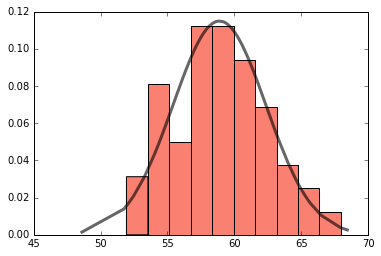

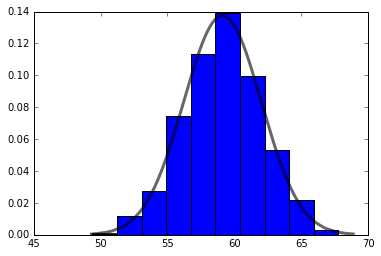

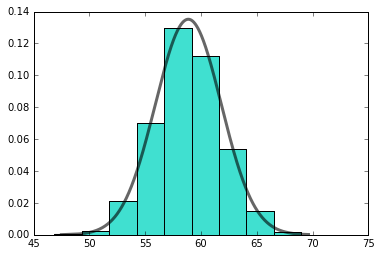

In [23]:
#item 4
mu = esp
sigma = (var**(1/2))
plt.hist(G_list, normed=True, color='salmon')
x=sorted(stats.norm.rvs(size=n, loc=mu, scale=sigma))
plt.plot(x, stats.norm.pdf(x, loc=mu, scale=sigma), lw=3, alpha=0.6, color='black')
plt.show()

mu2 = esp2
sigma2 = (var2**(1/2))
plt.hist(G2_list, normed=True, color='gold')
x2=sorted(stats.norm.rvs(size=n2, loc=mu2, scale=sigma2))
plt.plot(x2, stats.norm.pdf(x2, loc=mu2, scale=sigma2), lw=3, alpha=0.6, color='black')
plt.hist(G2_list, normed=True)
plt.show()

mu3 = esp3
sigma3 = (var3**(1/2))
plt.hist(G3_list, normed=True)
x3=sorted(stats.norm.rvs(size=n3, loc=mu3, scale=sigma3))
plt.plot(x3, stats.norm.pdf(x3, loc=mu3, scale=sigma3), lw=3, alpha=0.6, color='black')
plt.hist(G3_list, normed=True, color='turquoise')
plt.show()

In [24]:
#item 5

corXY2 = 0
covXY2 = corXY2*(varX*varY)**(0.5)
cov2 = [[varX, covXY2], [covXY2, varY]]

x, y = np.random.multivariate_normal(mean, cov2, n).T
print("Matriz de covariâncias a partir dos n valores (100) correlacionados:")
print(np.cov(x,y))

x2, y2 = np.random.multivariate_normal(mean, cov2, n2).T
print("Matriz de covariâncias a partir dos n valores (1000) correlacionados:")
print(np.cov(x2,y2))

x3, y3 = np.random.multivariate_normal(mean, cov2, n3).T
print("Matriz de covariâncias a partir dos n valores (10000) correlacionados:")
print(np.cov(x3,y3))

Matriz de covariâncias a partir dos n valores (100) correlacionados:
[[ 4.36999629 -0.17828396]
 [-0.17828396  1.93160349]]
Matriz de covariâncias a partir dos n valores (1000) correlacionados:
[[ 3.8044877   0.00420964]
 [ 0.00420964  2.2776907 ]]
Matriz de covariâncias a partir dos n valores (10000) correlacionados:
[[ 3.9020865  -0.03243575]
 [-0.03243575  2.25538351]]


In [25]:
'''esperança n = 100'''
G = 0
G_list=[]
for i in range (0,n):
    num = (x[i]+y[i])
    G += num
    G_list.append(num)
    
esp0 = G/n
print ('Esperança de G quando n = {0}: {1}'.format(n, esp0)) 

'''esperança n = 1000'''

G2 = 0
G2_list=[]
for i in range (0,n2):
    num = (x2[i]+y2[i])
    G2 += num
    G2_list.append(num)
    
esp20 = G2/n2
print ('Esperança de G quando n = {0}: {1}'.format(n2, esp20))    

'''esperança n = 10000'''

G3=0
G3_list = []
for i in range (0,n3):
    num = (x3[i]+y3[i])
    G3 += num
    G3_list.append(num)
    
esp30 = G3/n3
print ('Esperança de G quando n = {0}: {1}'.format(n3, esp30)) 


'''Variancia n = 100'''

var0 = 0
for i in range (0,n):
    var0 += (((G_list[i]-esp0)**2)/n)
print ('Variancia de G quando n = {0}: {1}'.format(n, var0)) 

var20 = 0
for i in range (0,n2):
    var20 += (((G2_list[i]-esp20)**2)/n2)
print ('Variancia de G quando n = {0}: {1}'.format(n2, var20)) 

var30= 0
for i in range (0,n3):
    var30 += (((G3_list[i]-esp30)**2)/n3)
print ('Variancia de G quando n = {0}: {1}'.format(n3, var30)) 

Esperança de G quando n = 100: 39.81070493479918
Esperança de G quando n = 1000: 39.85912453484067
Esperança de G quando n = 10000: 39.89936075869414
Variancia de G quando n = 100: 5.885581536859418
Variancia de G quando n = 1000: 6.084507077971979
Variancia de G quando n = 10000: 6.0919892524856


In [26]:
Esp_G0 = muX + muY
Var_G0 = varX + varY + (2*covXY2)

print ('''O valor teórico da esperança de G é: {0}
O valor teórico da variância de G é: {1}
'''.format(Esp_G0, Var_G0))

O valor teórico da esperança de G é: 39.9
O valor teórico da variância de G é: 6.25



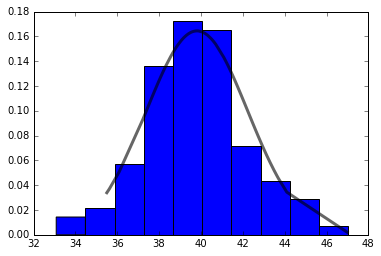

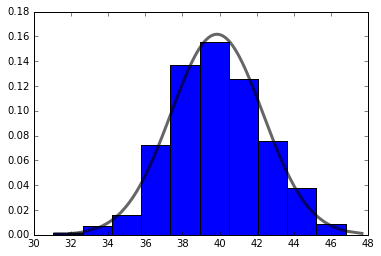

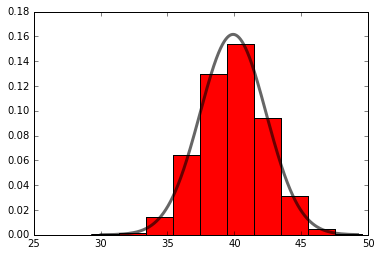

In [27]:
mu0= esp0
sigma0 = (var0**(1/2))
plt.hist(G_list, normed=True, color='blue')
x=sorted(stats.norm.rvs(size=n, loc=mu0, scale=sigma0))
plt.plot(x, stats.norm.pdf(x, loc=mu0, scale=sigma0), lw=3, alpha=0.6, color='black')
plt.show()

mu20 = esp20
sigma20 = (var20**(1/2))
plt.hist(G2_list, normed=True, color='gold')
x2=sorted(stats.norm.rvs(size=n2, loc=mu20, scale=sigma20))
plt.plot(x2, stats.norm.pdf(x2, loc=mu20, scale=sigma20), lw=3, alpha=0.6, color='black')
plt.hist(G2_list, normed=True)
plt.show()

mu30 = esp30
sigma30 = (var30**(1/2))
plt.hist(G3_list, normed=True)
x3=sorted(stats.norm.rvs(size=n3, loc=mu30, scale=sigma30))
plt.plot(x3, stats.norm.pdf(x3, loc=mu30, scale=sigma30), lw=3, alpha=0.6, color='black')
plt.hist(G3_list, normed=True, color='red')
plt.show()